# THE SPARKS FOUNDATION

To Predict the percentage of marks of the students based on the number of hours they studied


# Author- Deepti Dilip Wandhekar



# Abstract

In this section we are going to see how we use python scikit library for implementing Regression function.
In this regressin task we will Predict the percentage of marks of the students based on the number of hours they studied.



# Import the required libraries

In [123]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



# Read the data set

In [138]:

data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv') 
print("Data Imported Successfully")

data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25



# Check the data is null or not

In [125]:
data.isnull == True

False


# Describing the Data set

In [126]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000



# Plotting Data on 2D Graph

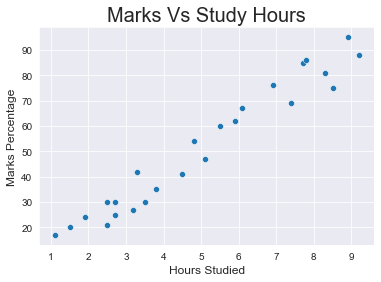

In [127]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Plotting the regression line

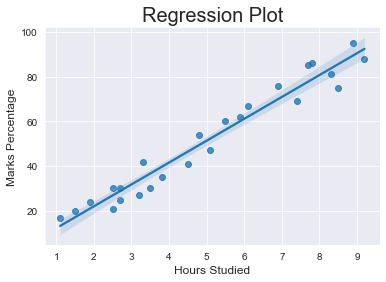

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [128]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

# Divide Data into Attributes(Input) and Labels(Output)

In [129]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  #Inputs or attributes

X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [130]:
y = data.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Split the data into training and test set

In [131]:

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Training the Model

regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

# Making Predictions

In [132]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [133]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


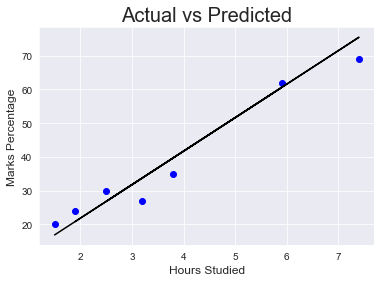

In [134]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Calculate the accuracy of model

 print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))


In [135]:
hours = [9.25]
print("Hours=", format(hours))
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Hours= [9.25]
Score = 93.893


# Evalating the model

In [136]:
from sklearn import metrics
print('Mean absolute Error:', metrics.mean_absolute_error(val_y , pred_y))
print('Mean square Error:', metrics.mean_squared_error(val_y , pred_y))
print('R2 score:', metrics.r2_score(val_y , pred_y))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(val_y , pred_y))

Mean absolute Error: 4.130879918502486
Mean square Error: 20.33292367497997
R2 score: 0.9367661043365055
Mean Absolute Percentage Error: 0.1283906350228135


# Thanks